# Solar Power Generation Forecasting 



## importing libraries

In [ ]:
import pandas as pd
import numpy as np


import xgboost

import datetime
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import files
uploaded = files.upload()  # needs to load main_file8_v1.csv

Saving main_file8_v1.csv to main_file8_v1.csv


## importing dataset

In [ ]:

dts = pd.read_csv('main_file8_v1.csv')
dts.head(3)

,Ambient Temperature Celsius,AVG in-plane irradiance,Back-of-Module Temperature (deg C),Back-of-Module Temperature 2 (deg C),Irradiance Global (W/m^2),Irradiance Plane-of-Array (W/m^2),Rainfall (mm),Weather Atmospheric Pressure,Weather Relative Humidity,Wind Direction (Hour Interval),S4_PM4
0,21.8,0,20.6,20.0,0,0,3482.6,1004,67,123,0.0
1,21.5,0,20.4,19.7,0,0,3482.6,1004,67,91,0.0
2,20.9,0,19.8,19.1,0,0,3482.6,1004,68,85,0.0


In [ ]:
X_with_lbl = dts.iloc[:, :-1] 
X_with_lbl.columns

Index(['Ambient Temperature Celsius', 'AVG in-plane irradiance',
       'Back-of-Module Temperature (deg C)',
       'Back-of-Module Temperature 2 (deg C)', 'Irradiance Global (W/m^2)',
       'Irradiance Plane-of-Array (W/m^2)', 'Rainfall (mm)',
       'Weather Atmospheric Pressure', 'Weather Relative Humidity',
       'Wind Direction (Hour Interval)'],
      dtype='object')

In [ ]:
X = dts.iloc[:, :-1].values
y = dts.iloc[:, -1].values
 # Converting into integers 
y=np.array(y)
y=y.astype(int)
 #---------------------------


In [ ]:
X

In [ ]:
y

## Splitting Training and Test sets

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print("Train Shape: {} {} \nTest Shape: {} {}".format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

Train Shape: (17225, 10) (17225,) 
Test Shape: (5742, 10) (5742,)


In [ ]:
print(y_train[0:10].ravel())

## Creating SVR



In [ ]:
# create an xgboost regression model
model = xgboost.XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=1)
model.fit(X_train, y_train.ravel())

[15:04:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(eta=0.1, max_depth=7, n_estimators=1000, subsample=0.7)

### defining accuracy function

In [ ]:
print(model .feature_importances_)
#plot graph of feature importances for better visualization
feat_importances = pd.Series(svr_poly.feature_importances_, index=X_with_lbl.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

XGBoostError: ignored

In [ ]:

model.score(X_test, y_test)

0.9419475703403277

In [ ]:
y_pred = model.predict(X_test)
y_pred1 = y_pred.reshape(len(y_pred), 1)
y_pred1

array([[ 1.7534614e-02],
       [ 9.6575861e+00],
       [ 7.0674812e+01],
       ...,
       [ 1.0088461e+01],
       [-9.6805096e-03],
       [ 1.7361049e+02]], dtype=float32)

In [ ]:
y_pred = model.predict(X_test) # get model predictions (scaled inputs here)
y_pred_orig = (y_pred) # unscale the predictions
y_test_orig = (y_test) # unscale the true test outcomes

In [ ]:
train_pred_orig= model.predict(X_train) # get model predictions (scaled inputs here)
y_train_orig =y_train



In [ ]:


y_test1 = y_test.reshape(len(y_test), 1)
a = np.concatenate((y_pred1, y_test1), 1)
am = pd.DataFrame(data  = a, columns = ('Predicted Value', 'Real Value'))
pd.options.display.float_format = "{:,.2f}".format
am[1:10]

,Predicted Value,Real Value
1,9.66,16.00
2,70.67,53.00
3,148.29,141.00
4,0.01,0.00
5,-0.01,0.00
6,-0.04,0.00
7,162.69,74.00
8,166.37,176.00
9,4.85,5.00


In [ ]:
len(y_pred)


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9419475703403277

In [ ]:
y_test.shape
#y_pred.shape
y_test
y_pred3=y_pred.astype(int)
y_pred3

array([  0,   9,  70, ...,  10,   0, 173])

In [ ]:
y_pred1

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred3)
cm

array([[   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       [   2,    8, 3062, ...,    0,    0,    0],
       ...,
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0]])

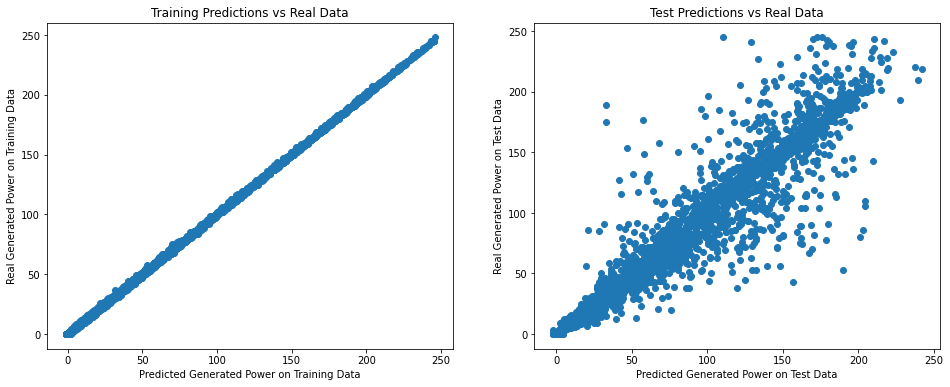

In [ ]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,2)
plt.scatter(y_pred_orig, y_test_orig)
plt.xlabel('Predicted Generated Power on Test Data')
plt.ylabel('Real Generated Power on Test Data')
plt.title('Test Predictions vs Real Data')
#plt.scatter(y_test_orig, sc_X.inverse_transform(X_test)[:,2], color='green')
plt.subplot(1,2,1)
plt.scatter(train_pred_orig, y_train_orig)
plt.xlabel('Predicted Generated Power on Training Data')
plt.ylabel('Real Generated Power on Training Data')
plt.title('Training Predictions vs Real Data')
plt.show()